[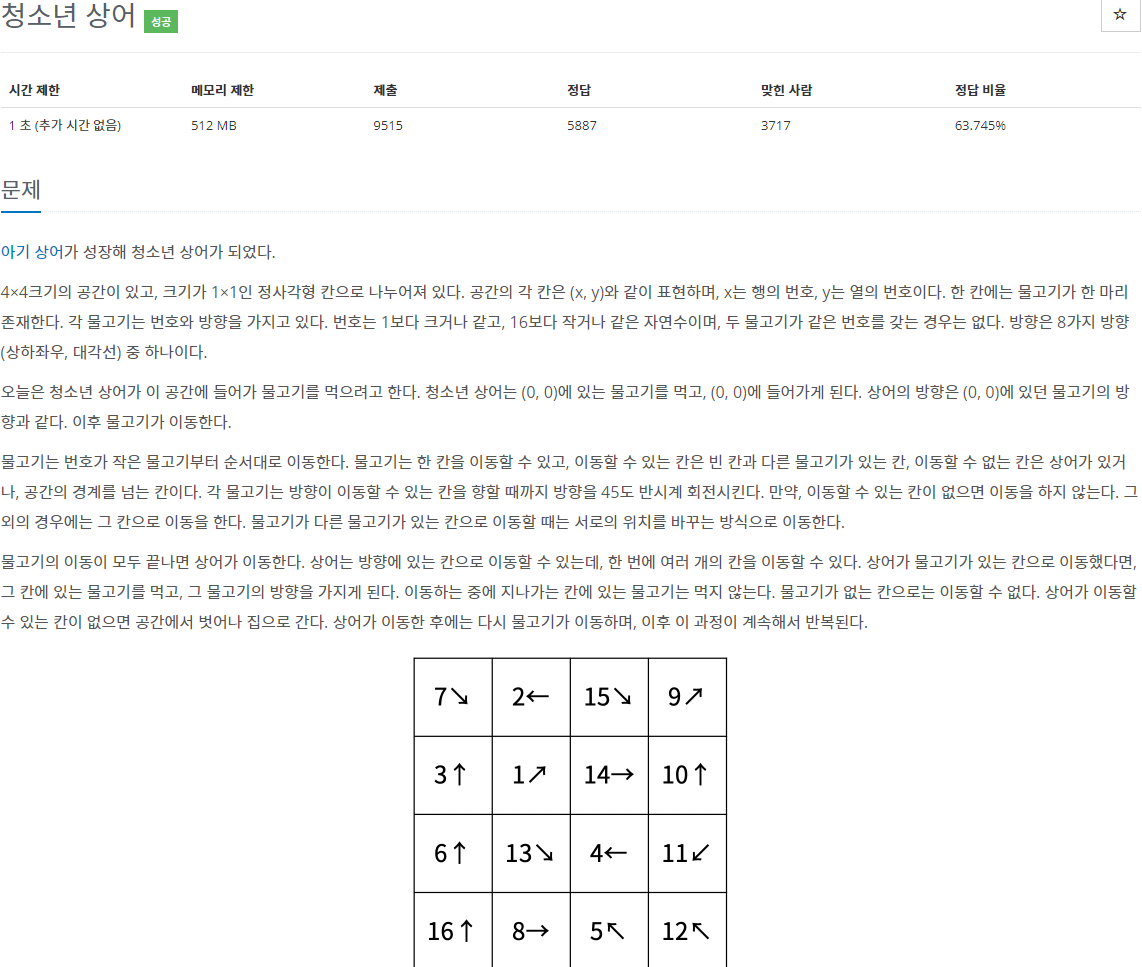](https://www.acmicpc.net/problem/19236)

---

In [ ]:
from copy import deepcopy


def move(arr, x, y):
    for fish in range(1, 17):
        t = 0
        for i in range(4):
            for j in range(4):
                if arr[i][j][0] == fish:
                    t = (i, j)
                    fish_d = arr[i][j][1]
                    break
        if not t:
            continue
        # 가장 작은 물고기를 찾았음
        for di in range(8):
            di = (fish_d + di) % 8
            ni, nj = t[0] + p[di][0], t[1] + p[di][1]
            if 0 <= ni < 4 and 0 <= nj < 4 and (ni, nj) != (x, y):    # 물고기 이동 가능
                temp = arr[ni][nj]
                arr[ni][nj] = (fish, di)
                arr[t[0]][t[1]] = temp
                break
    return arr


def dfs(arr, x, y, d, cnt):
    global ans
    nx, ny = x + p[d][0], y + p[d][1]
    if nx < 0 or nx > 3 or ny < 0 or ny > 3:    # 상어 퇴근
        ans = max(ans, sum(cnt))
        return
    move(arr, x, y)
    tt = 0
    for s in range(1, 4):
        nx, ny = x + s * p[d][0], y + s * p[d][1]
        if 0 <= nx < 4 and 0 <= ny < 4 and arr[nx][ny][0]:
            tt += 1
            q = deepcopy(arr)
            temp = q[nx][ny]
            q[nx][ny] = (0, 0)
            dfs(q, nx, ny, temp[1], cnt + [temp[0]])
            q[nx][ny] = temp
    if not tt:
        ans = max(ans, sum(cnt))

p = [[-1, 0], [-1, -1], [0, -1], [1, -1], [1, 0], [1, 1], [0, 1], [-1, 1]]
arr = []
for _ in range(4):
    a = list(map(int, input().split()))
    temp = []
    for i in range(0, 8, 2):
        temp.append((a[i], a[i + 1] - 1))
    arr.append(temp)
ans, d = arr[0][0][0], arr[0][0][1]
arr[0][0] = (0, 0)
dfs(arr, 0, 0, d, [ans])
print(ans)